# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pandas as pd

import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

In [2]:
from multiprocessing import Queue

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
#validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

#with open(validation_file, mode='rb') as f:
#    valid = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
#X_train, y_train = train['features'], train['labels']
#X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_validation = train_test_split(train['features'], train['labels'], test_size=0.10, random_state=0)
                                                  #test_size=0.2,
                                                  #random_state=42)

In [5]:
print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("validation set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   31319 samples
validation set: 3480 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31319
Number of validation examples = 3480
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Sample images


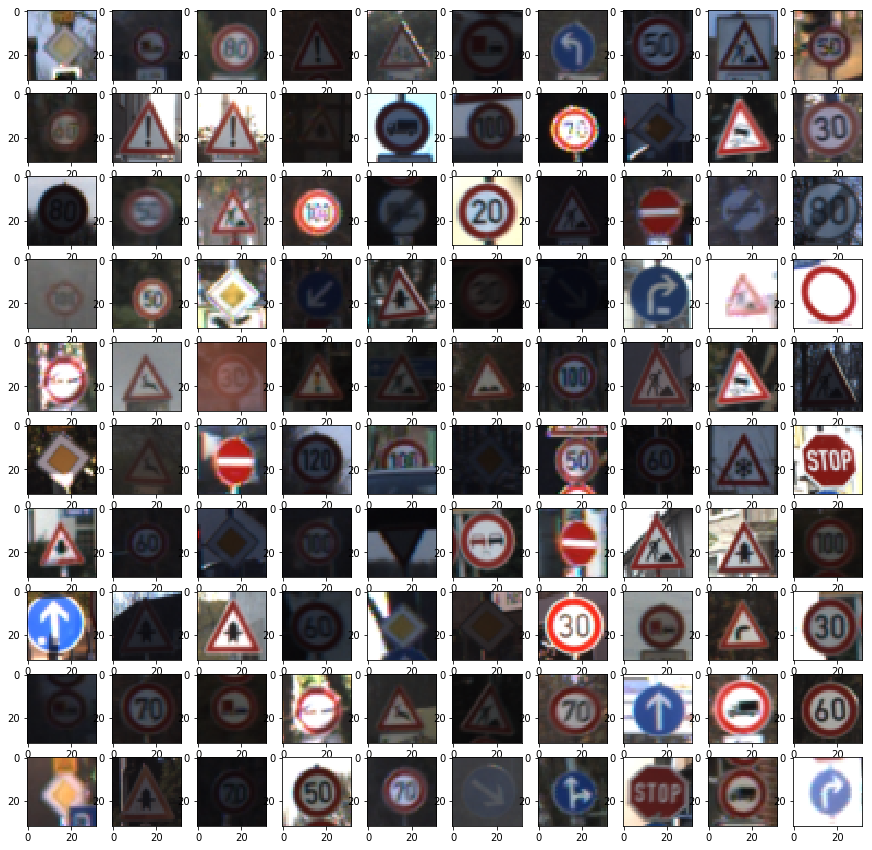

In [7]:
# Plot four sample images

import random

print('Sample images')



for i in range(100):
    index = random.randint(0, len(X_train))
    plt.figure(1, figsize=(15,15))
    
    plt.subplot(10, 10, i+1)
    
    plt.imshow(X_train[index])
    i = i + 1 
plt.show()

[]

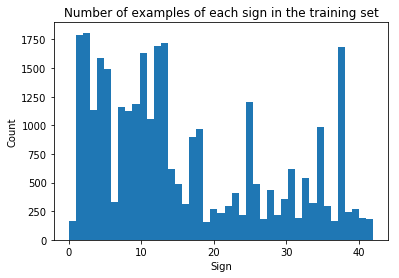

In [8]:
# Plot a histogram of the count of the number of examples of each sign
# in the test set

plt.hist(y_train, bins=n_classes)
plt.title('Number of examples of each sign in the training set')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 


In [ ]:
'''
Question 1
Describe the techniques used to preprocess the data.
Answer:

1, I converted colored images to grayscale images. 

Colors may help to identify the signs, but due to publications, they don't help too much. 

However, considering brightness differences,  weathers, 
even images of the same sign may have very different color values, 
so color information may bring in more as noises. 
Thus for simplicity, I only use grayscale images for traings, validations, and accordingly for testing.


2, I shuffled the data so that it wouldn't be in any patterned order.

3, to better match the relu activation functions, and more robust to brightness, I normorlized grayscale
images, divide pixel values by 255.,  therefore all pixel values shall between [0, 1]

4, I also considered to use localized histogram exposure, which may change the low contrast of each image,
this may help to resist against bad, dark weather.
   I leave this as an opition, if my validation rate is far below than rqeuired 93%, luckily I don't need to
handle it in this task :)

see localized histogram exposure at
http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html#sphx-glr-auto-examples-color-exposure-plot-equalize-py



'''


    
    

In [9]:
X_train_color = X_train
X_test_color = X_test
X_valid_color = X_valid

orig = X_train[0].shape



In [10]:
X_train_gray = np.dot(X_train_color[...,:3], [0.299, 0.587, 0.114])

#print(X_train_gray)
norm_X_train_gray = (X_train_gray * 1.0 / 255.).astype(np.float32) #(32,32)

print(X_train_gray.mean(), norm_X_train_gray.mean(), len(norm_X_train_gray) )

81.8293228148 0.320899 31319


In [11]:
X_test_gray = np.dot(X_test_color[...,:3], [0.299, 0.587, 0.114])

norm_X_test_gray = (X_test_gray * 1.0 / 255.).astype(np.float32)

print(X_test_gray.mean(), norm_X_test_gray.mean(), len(norm_X_test_gray) )

81.2767774761 0.318732 12630


In [12]:
X_valid_gray = np.dot(X_valid_color[...,:3], [0.299, 0.587, 0.114])
 
norm_X_valid_gray = (X_valid_gray * 1.0 / 255.).astype(np.float32)

print(X_valid_gray.mean(), norm_X_valid_gray.mean(), len(norm_X_valid_gray) )

82.7007490117 0.324317 3480


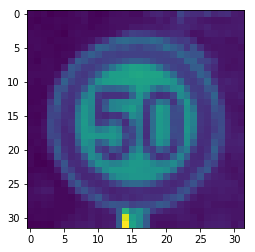

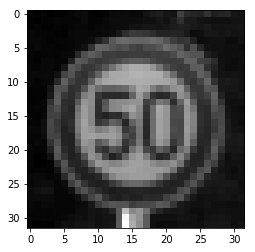

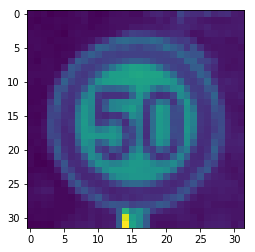

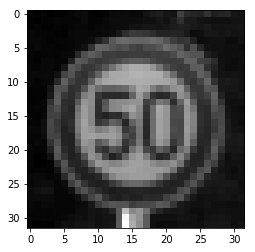

In [13]:
plt.figure()
plt.imshow(X_train_gray[100])

plt.figure()
plt.imshow(X_train_gray[100],cmap='Greys_r')


plt.figure()
plt.imshow(norm_X_train_gray[100])

plt.figure()
plt.imshow(norm_X_train_gray[100],cmap='Greys_r')

plt.show()

### Model Architecture

In [ ]:
'''
Question 2
Describe how you set up the training, validation and testing data for your model. 
If you generated additional data, why?
Answer:

I split the train dataset into validation.

I also shuffled the train data, as described above, to remove any bias towards patterns in the existing dataset.



'''

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [ ]:
'''
Question 3
What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) 
For reference on how to build a deep neural network using TensorFlow, 
see Deep Neural Network in TensorFlow from Question 2
Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?the classroom.


Answer: because image classification tasks are quite similar, but my traffic sign dataset is much smaller than
ImageNet, so due to Transfer Learning, I only need to input grayscale images and so the number of channels is 1:


so there are 2-layers CNNs + 3-layers full-connections architecture:



Layer 1: Convolutional 32x32x1. The output shape should be 28x28x6.
         Activation = Relu
         Max-Pooling. The output shape should be 14x14x6.
----------------------------------------------------
Layer 2: Convolutional. The output shape should be 10x10x16.
         Activation = Relu
         Max-Pooling. The output shape should be 5x5x16.
----------------------------------------------------
         Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.
         input 400 = 5 * 5 *16, output = 120
----------------------------------------------------
Layer 3: Fully Connected. This should have input 400 = 5 * 5 *16, output = 120
         Activation. 
Layer 4: Fully Connected. This should have input 120, output 84 outputs.
         Activation
Layer 5: Fully Connected (Logits). This should have 43 outputs !
         Activation
----------------------------------------------------------------
         apply dropouts to avoid over-fitting
         
         
'''

In [14]:

X_inputset = [ np.reshape(img, (orig[0], orig[1], 1)) for img in norm_X_train_gray ]  #(32,32,1)
print(" X_inputset Shape: {}".format(X_inputset[0].shape))
print(len(X_inputset))

 X_inputset Shape: (32, 32, 1)
31319


In [15]:

X_testset = [ np.reshape(img, (orig[0], orig[1], 1)) for img in norm_X_test_gray ]  #(32,32,1)
print(" X_testset Shape: {}".format(X_testset[0].shape))
print(len(X_testset))

 X_testset Shape: (32, 32, 1)
12630


In [16]:
X_validset = [ np.reshape(img, (orig[0], orig[1], 1)) for img in norm_X_valid_gray ]  #(32,32,1)
print(" X_validset Shape: {}".format(X_validset[0].shape))
print(len(X_validset))

 X_validset Shape: (32, 32, 1)
3480


In [17]:
from sklearn.utils import shuffle

X_inputset, y_train = shuffle(X_inputset, y_train)


In [18]:
'''
Question 3
What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) 
For reference on how to build a deep neural network using TensorFlow, 
see Deep Neural Network in TensorFlow from the classroom.


Answer: because image classification tasks are quite similar, but my traffic sign dataset is much smaller than
ImageNet, so due to Transfer Learning, I only need to input grayscale images and so the number of channels is 1:


so there are 2-layers CNNs + 3-layers full-connections architecture:



Layer 1: Convolutional 32x32x1. The output shape should be 28x28x6.
         Activation = Relu
         Max-Pooling. The output shape should be 14x14x6.
----------------------------------------------------
Layer 2: Convolutional. The output shape should be 10x10x16.
         Activation = Relu
         Max-Pooling. The output shape should be 5x5x16.
----------------------------------------------------
         Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.
         input 400 = 5 * 5 *16, output = 120
----------------------------------------------------
Layer 3: Fully Connected. This should have input 400 = 5 * 5 *16, output = 120
         Activation. 
Layer 4: Fully Connected. This should have input 120, output 84 outputs.
         Activation
Layer 5: Fully Connected (Logits). This should have 43 outputs !
         Activation
----------------------------------------------------------------
         apply dropouts to avoid over-fitting
         
         
'''

"\nQuestion 3\nWhat does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) \nFor reference on how to build a deep neural network using TensorFlow, \nsee Deep Neural Network in TensorFlow from the classroom.\n\n\nAnswer: because image classification tasks are quite similar, but my traffic sign dataset is much smaller than\nImageNet, so due to Transfer Learning, I only need to input grayscale images and so the number of channels is 1:\n\n\nso there are 2-layers CNNs + 3-layers full-connections architecture:\n\n\n\nLayer 1: Convolutional 32x32x1. The output shape should be 28x28x6.\n         Activation = Relu\n         Max-Pooling. The output shape should be 14x14x6.\n----------------------------------------------------\nLayer 2: Convolutional. The output shape should be 10x10x16.\n         Activation = Relu\n         Max-Pooling. The output shape should be 5x5x16.\n----------------------------------------------------\n         Flatten the output shape 

In [19]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

# graph = tf.Graph()
# with graph.as_default():

patch_size = 5
num_channels = 1 #grayscale
depth_1 = 6
depth_2 = 16
full_1_output = 120
full_2_output = 84
full_3_output = 43
dropout_keepers = .8

def LeNet(x):   
    # Hyperparameters
    mu = 0
    
    #why use stddev 0.1?
    sigma = 0.1

    weights = {
        'layer_1': tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, depth_1], mean=mu, stddev=sigma)),
        'layer_2': tf.Variable(tf.truncated_normal([patch_size, patch_size, depth_1, depth_2], mean=mu, stddev=sigma)),
        'layer_3': tf.Variable(tf.truncated_normal([400, full_1_output], mean=mu, stddev=sigma)),
        'layer_4': tf.Variable(tf.truncated_normal([full_1_output, full_2_output], mean=mu, stddev=sigma)),
        'layer_5': tf.Variable(tf.truncated_normal([full_2_output, full_3_output], mean=mu, stddev=sigma))
    }
    
    biases = {
        'layer_1': tf.Variable(tf.zeros([depth_1])),
        'layer_2': tf.Variable(tf.zeros(shape=[depth_2])),
        'layer_3': tf.Variable(tf.zeros(shape=[full_1_output])),
        'layer_4': tf.Variable(tf.zeros(shape=[full_2_output])),
        'layer_5': tf.Variable(tf.zeros(shape=[full_3_output]))
    }


    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x, weights['layer_1'], [1, 1, 1, 1], padding='VALID')

    
    # TODO: Activation.
    hidden_1 = tf.nn.dropout(tf.nn.relu(conv1 + biases['layer_1']), dropout_keepers)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    max_1 = tf.nn.max_pool(hidden_1, [1, 2, 2, 1], [1, 2, 2, 1], padding="SAME")

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv_2 = tf.nn.conv2d(max_1, weights['layer_2'], [1, 1, 1, 1], padding="VALID")

    # TODO: Activation.
    hidden_2 =  tf.nn.dropout(tf.nn.relu(conv_2 + biases['layer_2']), dropout_keepers)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    max_2 = tf.nn.max_pool(hidden_2, [1, 2, 2, 1], [1, 2, 2, 1], padding="SAME")


    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(max_2)

    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.

    full_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(flat, weights['layer_3']) + biases['layer_3']), dropout_keepers)


    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    full_2 =  tf.nn.dropout(tf.nn.relu(tf.matmul(full_1, weights['layer_4']) + biases['layer_4']), dropout_keepers)


    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.matmul(full_2, weights['layer_5']) + biases['layer_5']



    '''
    test weights:
    '''
    print(" weights['conv1'][0] : ", weights['layer_1'][0])
    print(" weights['conv2'][0] : ", weights['layer_2'][0])
    print(" weights['fc1'][0] : ", weights['layer_3'][0])
    print(" weights['fc2'][0] : ", weights['layer_4'][0])
    print(" weights['fc3'][0] : ", weights['layer_5'][0])
    
    return logits, weights, conv1, hidden_1, max_1, conv_2, hidden_2, max_2, full_1, full_2


In [20]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
last_validation_score = 0



rate = 0.001


logits, weights, conv1, hidden1, max1, conv2, hidden2, max2, fc1, fc2 = LeNet(x)

 weights['conv1'][0] :  Tensor("strided_slice:0", shape=(5, 1, 6), dtype=float32)
 weights['conv2'][0] :  Tensor("strided_slice_1:0", shape=(5, 6, 16), dtype=float32)
 weights['fc1'][0] :  Tensor("strided_slice_2:0", shape=(120,), dtype=float32)
 weights['fc2'][0] :  Tensor("strided_slice_3:0", shape=(84,), dtype=float32)
 weights['fc3'][0] :  Tensor("strided_slice_4:0", shape=(43,), dtype=float32)


In [21]:
# l2 = tf.nn.l2_loss(weights['layer_1']) + tf.nn.l2_loss(weights['layer_2']) + tf.nn.l2_loss(weights['layer_3']) + tf.nn.l2_loss(weights['layer_4']) + tf.nn.l2_loss(weights['layer_5'])
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

In [22]:
# cross_entropy + beta * l2
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [23]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [24]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [25]:


'''
######################### start training ###################################

'''
import tensorflow as tf
import time

# Initialise time logs
init_time = time.time()
epoch_time = init_time

validation_accuracy = 0.0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_inputset)
    
    epoch_time = init_time
    print("Training...")
    print()
    
    for i in range(EPOCHS):
        if validation_accuracy > 0.95:
            break
        
        last_epoch_time = epoch_time
        
        X_inputset, y_train = shuffle(X_inputset, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_inputset[offset:end], y_train[offset:end]
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            

        validation_accuracy = evaluate(X_validset, y_validation)

        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        epoch_time = time.time()
        print("Time since last epoch: ", epoch_time - last_epoch_time)      
        
        print()
    
    print("Optimization Finished!")
    test_accuracy = evaluate(X_testset, y_test)
    print('test_accuracy is: ', test_accuracy)
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.547
Time since last epoch:  23.53199601173401

EPOCH 2 ...
Validation Accuracy = 0.740
Time since last epoch:  24.02088713645935

EPOCH 3 ...
Validation Accuracy = 0.791
Time since last epoch:  23.333439826965332

EPOCH 4 ...
Validation Accuracy = 0.833
Time since last epoch:  23.400387048721313

EPOCH 5 ...
Validation Accuracy = 0.864
Time since last epoch:  23.38344717025757

EPOCH 6 ...
Validation Accuracy = 0.888
Time since last epoch:  23.36543893814087

EPOCH 7 ...
Validation Accuracy = 0.891
Time since last epoch:  23.399585008621216

EPOCH 8 ...
Validation Accuracy = 0.915
Time since last epoch:  23.350122928619385

EPOCH 9 ...
Validation Accuracy = 0.912
Time since last epoch:  24.328964948654175

EPOCH 10 ...
Validation Accuracy = 0.920
Time since last epoch:  23.279834032058716

EPOCH 11 ...
Validation Accuracy = 0.932
Time since last epoch:  23.619760990142822

EPOCH 12 ...
Validation Accuracy = 0.930
Time since last epoch:  

In [ ]:
'''
Question 4
How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)

Answer: 
Adamoptimizer is more efficient than normal gradient descent to
find the optimum by dynamically changing the gradient. 

learning rate is set to be .001, Batch size = 128.


Dropout is 0.8

I ran it for 30 epochs, after 16 epoch the validation accuracy reaches 95% and stopped.


Weights set to the default values of 0 mean and .1 standard deviation to start to resemble a normal distribution.

'''

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [ ]:
'''
Question 5
What approach did you take in coming up with a solution to this problem?
Answer:

1, the classical LeNet which has 2 convolution layers and 3 fully-connected architecture is a good start for me
2, dropout is necessary to avoid over-fitting, still there are 8% over-fitting between validation and test
3, I spent lots of attempts in pre-processing the grayscale dataset: normalization, zero-mean, exposure, and there 
are also opitions to rotate each types of the traffic signs, to achieve that for every type of 43, they have same number 
of samples.
   From online kaggle competition results, this can finally lead to over 99% test accurarcy !
   
4, the LeNet architure was originially for hand-written digits recognition, so the features to be detected are much less 
than traffic signs, more features are necessary to increase the test accuracy from 87% to 99% !

'''

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [26]:
sign_names = pd.read_csv("signnames.csv")
sign_names.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [37]:
import os
import cv2
import matplotlib.image as mpimg
dir = 'new_german_signs/'
files = os.listdir(dir)

sess = tf.Session()
saver.restore(sess, './lenet')

Image Shape: (32, 32, 4)

gray Shape: (32, 32)

gray Shape: (1, 32, 32, 1)

scores_gray Shape: (1, 43)

[[-138.08345032 -109.71741486  -90.85028839  -40.34846115 -148.75656128
   -26.1896553   -71.83008575  -23.18370628 -116.25121307   15.17874336
    50.84272766   30.53369331  -31.3710022   -97.40962982 -132.25671387
  -117.75491333   21.94657898   -6.18404293  -75.9604187    13.04822922
    43.84516907   -6.74428606  -89.4010849    35.34158707  -22.88783646
   -33.4538002   -21.64779282  -45.69552994  -21.60867119  -53.01322556
    23.6644268   -26.83221817  -95.03369141    0.97952855  -73.21162415
   -51.5965004  -109.84846497  -23.25242043  -88.58926392  -83.98942566
   -34.26846695   -3.05079365   19.51920891]]
scores_norm_gray_1 Shape: (1, 43)

[[ -6.65766621  -1.08318269  -1.00953102  -2.51879573   0.92596
    0.64794189  -8.19486904  -1.13630009  -3.05577922  -2.73274779
   -1.45725513  -4.59389687  -1.11433864  -4.82505512  -7.15529346
   -3.8315258   -5.90467358  -6.7238183  

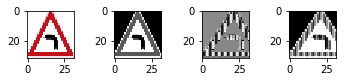

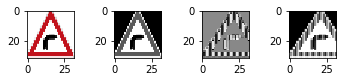

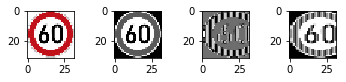

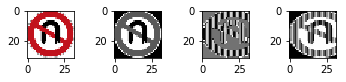

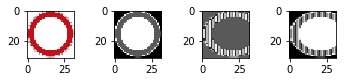

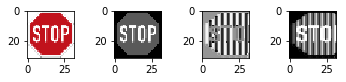

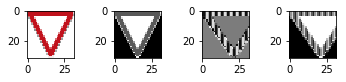

In [38]:
### Load the images and plot them 
### convert images to correct shape and grayscale
### predict and print prediction


for count, filename in enumerate(files):
    plt.figure()
    img = mpimg.imread(dir + filename)
    
    
    resized = cv2.resize(img, (32, 32))
    print("Image Shape: {}".format(resized.shape) + '\n')
    
    '''
    original 32,32
    '''
    plt.subplot(4,4,1)
    plt.imshow(resized)
    
    '''
    normalized gray
    '''
    resized_gray = np.dot(resized[...,:3], [0.299, 0.587, 0.114])
    norm_resized_gray = (resized_gray * 1.0 / 255.).astype(np.float32) #(32,32)

    plt.subplot(4,4,2)
    #plt.imshow(norm_resized_gray)     #colorful
    plt.imshow(norm_resized_gray, cmap='Greys_r')
    
    
    orig = resized.shape
    test = np.reshape(cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY), (orig[0], orig[1], 1))
    
    test_norm = (test - np.mean(test))*1.0 / (np.max(test) - np.min(test))
    plt.subplot(4,4,3)
    test_norm_32 = np.array(test_norm, dtype=np.float32)
    plt.imshow(cv2.cvtColor(test_norm_32,cv2.COLOR_GRAY2RGB))

    
    plt.subplot(4,4,4)
    
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    print("gray Shape: {}".format(gray.shape) + '\n')
    
    gray = np.reshape(gray, (1, 32, 32, 1)).astype(np.int32) #(1, 32, 32, 1)
    print("gray Shape: {}".format(gray.shape) + '\n')
    
    scores_gray = logits.eval(feed_dict={x:gray}, session=sess) #(1, 43)
    print("scores_gray Shape: {}".format(scores_gray.shape) + '\n')
    print(scores_gray)
    
    #prediction = tf.argmax(scores, 1)
    #print('prediction', filename, prediction.eval(session=sess))
    
    
    norm_gray_1 = np.reshape(norm_resized_gray, (1, 32, 32, 1)).astype(np.int32) #(1, 32, 32, 1)
    
    norm_gray_2 = np.reshape(norm_resized_gray, (1, 32, 32, 1)).astype(np.float32) 
    
    norm_gray_3 = np.reshape(norm_resized_gray, (1, 32, 32, 1))
    
    
    scores_norm_gray_1 = logits.eval(feed_dict={x:norm_gray_1}, session=sess) #(1, 43)
    print("scores_norm_gray_1 Shape: {}".format(scores_norm_gray_1.shape) + '\n')
    print(scores_norm_gray_1)
    
    scores_norm_gray_2 = logits.eval(feed_dict={x:norm_gray_2}, session=sess) #(1, 43)
    print("scores_norm_gray_2 Shape: {}".format(scores_norm_gray_2.shape) + '\n')
    print(scores_norm_gray_2)
    
    scores_norm_gray_3 = logits.eval(feed_dict={x:norm_gray_3}, session=sess) #(1, 43)
    print("scores_norm_gray_3 Shape: {}".format(scores_norm_gray_3.shape) + '\n')
    print(scores_norm_gray_3)
    
    
 

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [144]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
def predict(img):
    """Print model's prediction of which traffic sign this image is."""
    #classification = sess.run(tf.argmax(logits, 1), feed_dict={x_unflattened: [img]})
    #print(classification)
    #print('NN predicted', classification[0])
    
    '''
    original
    '''
    plt.figure()
    #img = mpimg.imread(dir + filename)
    plt.imshow(img)

    '''
    original gray
    '''
    resized = cv2.resize(img, (32, 32))
    
    '''
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    
    print('gray :', gray)
    
    plt.figure()
    plt.imshow(gray, cmap='gray')
    
    gray_i32 = np.reshape(gray, (1, 32, 32, 1)).astype(np.int32)
    print('gray_i32 :', gray_i32)
    gray_f32 = np.reshape(gray, (1, 32, 32, 1)).astype(np.float32)
    print('gray_f32 :', gray_f32)
    gray_type = np.reshape(gray, (1, 32, 32, 1))
    print('gray_type :', gray_type)
    #print('gray has shape:', gray.shape)
    '''

    
    '''
    normalized gray
    '''
    resized_gray = np.dot(resized[...,:3], [0.299, 0.587, 0.114])
    #print('resized_gray :', resized_gray)
    
    norm_type = (resized_gray * 1.0 / 255.) #(32,32)
    reshape_type = np.reshape(norm_type, (1, 32, 32, 1))
    #print('reshape_type :', reshape_type)
    
    '''
    norm_i32 = (resized_gray * 1.0 / 255.).astype(np.int32) #(32,32)
    reshape_i32 = np.reshape(norm_i32, (1, 32, 32, 1)).astype(np.int32)
    print('reshape_i32 :', reshape_i32)
    
    norm_f32 = (resized_gray * 1.0 / 255.).astype(np.float32) #(32,32)
    reshape_f32 = np.reshape(norm_f32, (1, 32, 32, 1)).astype(np.float32)
    print('reshape_f32 :', reshape_f32)
    '''

    
    plt.figure()
    plt.imshow(norm_type, cmap='gray')
    
    '''
    predict with different test set
    '''
    
    '''
    scores_i32 = logits.eval(feed_dict={x:gray_i32}, session=sess)
    prediction_i32 = tf.argmax(scores_i32, 1)
    label = prediction_i32.eval(session=sess)
    print('prediction_i32', sign_names.loc[label]['SignName'])
    
    scores_f32 = logits.eval(feed_dict={x:gray_f32}, session=sess)
    prediction_f32 = tf.argmax(scores_f32, 1)
    label = prediction_f32.eval(session=sess)
    print('prediction_f32', sign_names.loc[label]['SignName'])
    
    scores_type = logits.eval(feed_dict={x:gray_type}, session=sess)
    prediction_type = tf.argmax(scores_type, 1)
    label = prediction_type.eval(session=sess)
    print('prediction_type', sign_names.loc[label]['SignName'])
    
    '''
    
    scores_reshape_type = logits.eval(feed_dict={x:reshape_type}, session=sess)
    prediction_reshape_type = tf.argmax(scores_reshape_type, 1)
    label = prediction_reshape_type.eval(session=sess)
    print('prediction_reshape_type', sign_names.loc[label]['SignName'])
    
    '''
    scores_reshape_i32 = logits.eval(feed_dict={x:reshape_i32}, session=sess)
    prediction_reshape_i32 = tf.argmax(scores_reshape_i32, 1)
    label = prediction_reshape_i32.eval(session=sess)
    print('prediction_reshape_i32', sign_names.loc[label]['SignName'])
    
    scores_reshape_f32 = logits.eval(feed_dict={x:reshape_f32}, session=sess)
    prediction_reshape_f32 = tf.argmax(scores_reshape_f32, 1)
    label = prediction_reshape_f32.eval(session=sess)
    print('prediction_reshape_f32', sign_names.loc[label]['SignName'])
    '''

    
    
    
    
    #scores = logits.eval(feed_dict={x:gray}, session=sess)
    #prediction_2 = sess.run(tf.argmax(scores, 1), feed_dict={x_unflattened: [img]})
    
    #label = prediction_1.eval(session=sess)
    #print('prediction_1', sign_names.loc[label]['SignName'])
    #print('prediction_2')

In [81]:
def read_show_and_pred_image(image_path):
    """Read image, show image and print model's prediction (of 
    which traffic sign this image is).
    """
    # Read in image from file
    image = mpimg.imread(image_path)
    #plt.imshow(image) 

    
    #predict_gray(image)
    predict(image)
    
    return image

In [82]:
def show_and_pred_X_train(index):
    """Show image from training set and print model's prediction 
    (of which traffic sign this image is).
    """
    #plt.imshow(X_train[index])
    predict(X_train[index])

In [83]:
def show_and_pred_X_test(index):
    """Show image from training set and print model's prediction 
    (of which traffic sign this image is).
    """
    #plt.imshow(X_train[index])
    predict(X_test[index])

In [84]:
def show_and_pred_image(image):
    """Show image and print model's prediction (of which traffic 
    sign this image is).
    """
    #plt.imshow(image)
    predict(image)

prediction_reshape_type 18    General caution
Name: SignName, dtype: object


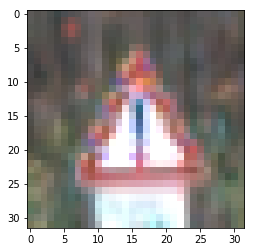

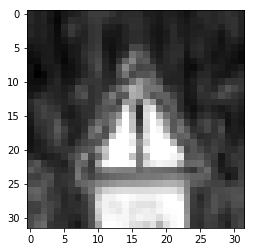

In [145]:
show_and_pred_X_train(40)

prediction_reshape_type 17    No entry
Name: SignName, dtype: object


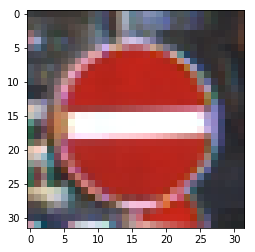

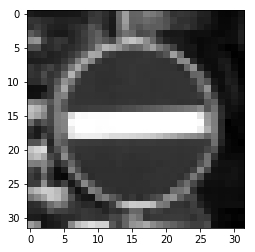

In [146]:
show_and_pred_X_test(1000)

In [87]:
def read_show_and_pred_image_tsdata(image_name):
    """Read image from dir `traffic-sign-data`, show image and print model's prediction (of 
    which traffic sign this image is).
    """
    #return read_show_and_pred_image('new_german_signs/' + image_name)
    return read_show_and_pred_image('jpeg/' + image_name)

resized_gray : [[  61.613   76.436  116.086 ...,  141.956   18.79    17.866]
 [  60.727   67.647   91.943 ...,   31.11    20.111   11.735]
 [  47.841   54.858   96.55  ...,  113.62    41.878   50.689]
 ..., 
 [ 146.456  149.755  155.211 ...,  173.196  171.196  169.239]
 [ 255.     255.     255.    ...,  255.     255.     255.   ]
 [ 255.     255.     255.    ...,  255.     255.     255.   ]]
reshape_type : [[[[ 0.24161961]
   [ 0.29974902]
   [ 0.45523922]
   ..., 
   [ 0.5566902 ]
   [ 0.07368627]
   [ 0.07006275]]

  [[ 0.2381451 ]
   [ 0.26528235]
   [ 0.36056078]
   ..., 
   [ 0.122     ]
   [ 0.07886667]
   [ 0.04601961]]

  [[ 0.18761176]
   [ 0.21512941]
   [ 0.37862745]
   ..., 
   [ 0.44556863]
   [ 0.16422745]
   [ 0.19878039]]

  ..., 
  [[ 0.57433725]
   [ 0.58727451]
   [ 0.60867059]
   ..., 
   [ 0.6792    ]
   [ 0.67135686]
   [ 0.66368235]]

  [[ 1.        ]
   [ 1.        ]
   [ 1.        ]
   ..., 
   [ 1.        ]
   [ 1.        ]
   [ 1.        ]]

  [[ 1.        ]


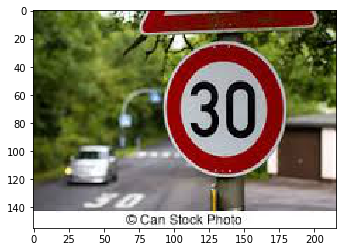

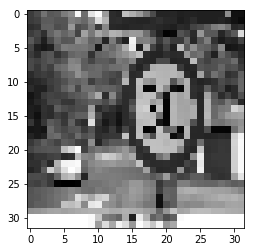

In [88]:
limit30zone_sign = read_show_and_pred_image_tsdata("30zone.jpeg")

resized_gray : [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
reshape_type : [[[[ 0.]
   [ 0.]
   [ 0.]
   ..., 
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ..., 
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ..., 
   [ 0.]
   [ 0.]
   [ 0.]]

  ..., 
  [[ 0.]
   [ 0.]
   [ 0.]
   ..., 
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ..., 
   [ 0.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ..., 
   [ 0.]
   [ 0.]
   [ 0.]]]]
reshape_i32 : [[[[0]
   [0]
   [0]
   ..., 
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ..., 
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ..., 
   [0]
   [0]
   [0]]

  ..., 
  [[0]
   [0]
   [0]
   ..., 
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ..., 
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ..., 
   [0]
   [0]
   [0]]]]
reshape_f32 : [[[[ 0.]
   [ 0.

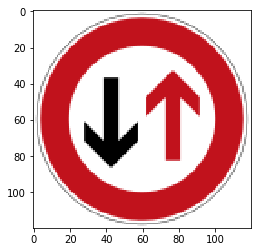

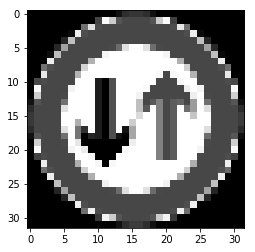

In [89]:
priority_coming_sign = read_show_and_pred_image_tsdata("priority_for_oncoming_vehicles.png")

resized_gray : [[ 0.23556986  0.81957722  0.82794118 ...,  0.82794118  0.8446691
   0.07601103]
 [ 0.64914215  0.61762683  0.5790316  ...,  0.5790316   0.6109022
   0.63370097]
 [ 0.96104885  0.25590013  0.25161178 ...,  0.25161178  0.25515296
   0.9780438 ]
 ..., 
 [ 0.97518859  0.26552602  0.26407133 ...,  0.26407133  0.26524744
   0.9844263 ]
 [ 0.67591918  0.70425987  0.69116762 ...,  0.69116762  0.70175258
   0.63599879]
 [ 0.11985296  0.82794118  0.82794118 ...,  0.82794118  0.82515317
   0.07463235]]
reshape_type : [[[[ 0.0009238 ]
   [ 0.00321403]
   [ 0.00324683]
   ..., 
   [ 0.00324683]
   [ 0.00331243]
   [ 0.00029808]]

  [[ 0.00254566]
   [ 0.00242207]
   [ 0.00227071]
   ..., 
   [ 0.00227071]
   [ 0.00239569]
   [ 0.0024851 ]]

  [[ 0.00376882]
   [ 0.00100353]
   [ 0.00098671]
   ..., 
   [ 0.00098671]
   [ 0.0010006 ]
   [ 0.00383547]]

  ..., 
  [[ 0.00382427]
   [ 0.00104128]
   [ 0.00103557]
   ..., 
   [ 0.00103557]
   [ 0.00104019]
   [ 0.0038605 ]]

  [[ 0.00265

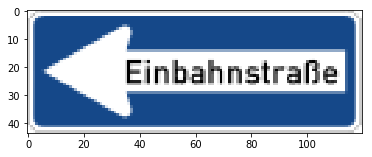

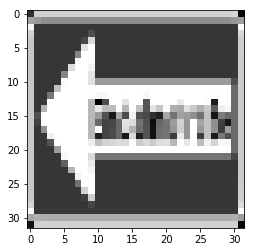

In [90]:
oneway_sign = read_show_and_pred_image_tsdata("onewaystreet.png")

resized_gray : [[ 115.088  118.964  136.33  ...,   69.111   68.111   69.111]
 [  90.716   93.271  115.985 ...,   71.111   70.111   70.111]
 [  89.107   88.814   98.135 ...,   71.111   70.111   70.111]
 ..., 
 [  99.268   99.268   99.257 ...,   94.702   93.702   93.702]
 [ 100.268  100.268  101.257 ...,   94.702   94.702   94.702]
 [ 100.98   102.257  101.257 ...,   97.012   95.012   97.012]]
reshape_type : [[[[ 0.45132549]
   [ 0.46652549]
   [ 0.53462745]
   ..., 
   [ 0.27102353]
   [ 0.26710196]
   [ 0.27102353]]

  [[ 0.35574902]
   [ 0.36576863]
   [ 0.45484314]
   ..., 
   [ 0.27886667]
   [ 0.2749451 ]
   [ 0.2749451 ]]

  [[ 0.34943922]
   [ 0.3482902 ]
   [ 0.38484314]
   ..., 
   [ 0.27886667]
   [ 0.2749451 ]
   [ 0.2749451 ]]

  ..., 
  [[ 0.38928627]
   [ 0.38928627]
   [ 0.38924314]
   ..., 
   [ 0.37138039]
   [ 0.36745882]
   [ 0.36745882]]

  [[ 0.39320784]
   [ 0.39320784]
   [ 0.39708627]
   ..., 
   [ 0.37138039]
   [ 0.37138039]
   [ 0.37138039]]

  [[ 0.396     ]


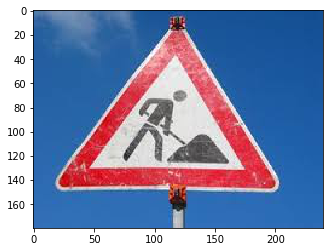

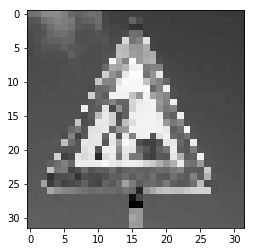

In [91]:
roadwork_sign = read_show_and_pred_image_tsdata("roadwork.jpeg")

resized_gray : [[ 229.673  232.673  230.673 ...,  219.129  218.77   221.77 ]
 [ 234.673  234.673  233.673 ...,  218.787  220.129  223.129]
 [ 236.673  236.673  235.673 ...,  221.146  222.673  222.673]
 ..., 
 [ 229.95   225.95   226.939 ...,   75.092  135.     160.   ]
 [ 235.195  239.195  235.363 ...,   87.092  144.658   63.359]
 [ 232.967  232.967  228.673 ...,   80.679  140.017   82.017]]
reshape_type : [[[[ 0.90067843]
   [ 0.91244314]
   [ 0.9046    ]
   ..., 
   [ 0.85932941]
   [ 0.85792157]
   [ 0.86968627]]

  [[ 0.92028627]
   [ 0.92028627]
   [ 0.91636471]
   ..., 
   [ 0.85798824]
   [ 0.86325098]
   [ 0.87501569]]

  [[ 0.92812941]
   [ 0.92812941]
   [ 0.92420784]
   ..., 
   [ 0.86723922]
   [ 0.87322745]
   [ 0.87322745]]

  ..., 
  [[ 0.90176471]
   [ 0.88607843]
   [ 0.88995686]
   ..., 
   [ 0.29447843]
   [ 0.52941176]
   [ 0.62745098]]

  [[ 0.92233333]
   [ 0.93801961]
   [ 0.92299216]
   ..., 
   [ 0.34153725]
   [ 0.56728627]
   [ 0.24846667]]

  [[ 0.91359608]


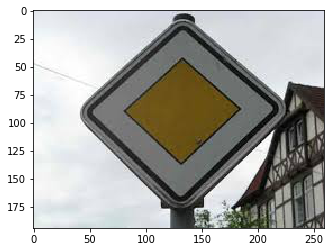

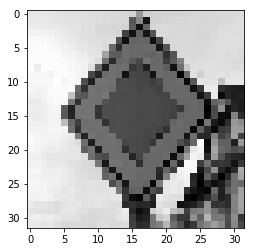

In [92]:
yellowdiamond_sign = read_show_and_pred_image_tsdata("yellowdiamond.jpeg")

resized_gray : [[ 255.     255.     255.    ...,  255.     255.     255.   ]
 [ 255.     255.     255.    ...,  255.     255.     255.   ]
 [ 255.     255.     255.    ...,  255.     255.     255.   ]
 ..., 
 [ 135.054   98.992   63.387 ...,    5.391   35.815   54.929]
 [ 133.456  159.941   69.619 ...,   16.57     2.929   44.929]
 [ 133.918  131.271  120.667 ...,   32.363   42.929    9.815]]
reshape_type : [[[[ 1.        ]
   [ 1.        ]
   [ 1.        ]
   ..., 
   [ 1.        ]
   [ 1.        ]
   [ 1.        ]]

  [[ 1.        ]
   [ 1.        ]
   [ 1.        ]
   ..., 
   [ 1.        ]
   [ 1.        ]
   [ 1.        ]]

  [[ 1.        ]
   [ 1.        ]
   [ 1.        ]
   ..., 
   [ 1.        ]
   [ 1.        ]
   [ 1.        ]]

  ..., 
  [[ 0.52962353]
   [ 0.38820392]
   [ 0.24857647]
   ..., 
   [ 0.02114118]
   [ 0.14045098]
   [ 0.21540784]]

  [[ 0.52335686]
   [ 0.62721961]
   [ 0.27301569]
   ..., 
   [ 0.06498039]
   [ 0.01148627]
   [ 0.17619216]]

  [[ 0.52516863]


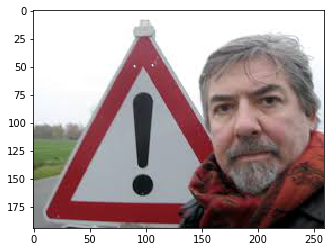

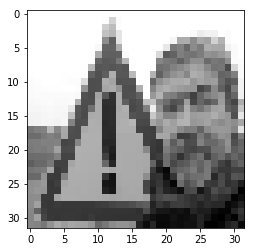

In [93]:
face_caution_sign = read_show_and_pred_image_tsdata("face_caution.jpeg")

In [94]:
'''

Question 6
Choose five candidate images of traffic signs and provide them in the report. 
Are there any particular qualities of the image(s) that might make classification difficult? 
It could be helpful to plot the images in the notebook.

Answer: 

1, there are images with people's face in front of the sign
2, there are German words with sign
3, there are color-related signs, each color has important meanings


'''

"\n\nQuestion 6\nChoose five candidate images of traffic signs and provide them in the report. \nAre there any particular qualities of the image(s) that might make classification difficult? \nIt could be helpful to plot the images in the notebook.\n\nAnswer: \n\n1, there are images with people's face in front of the sign\n2, there are German words with sign\n3, there are color-related signs, each color has important meanings\n\n\n"

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [95]:

def plot_certainty_arrays(probabilities, labels):
    """Plot model's probabilities (y) and traffic sign labels (x) 
    in a bar chart.
    """
    y_pos = np.arange(len(labels))
    performance = [10,8,6,4,2,1]

    plt.bar(y_pos, probabilities, align='center', alpha=0.5)
    plt.xticks(y_pos, labels)
    plt.ylabel('Probability')
    plt.xlabel('Traffic sign')
    plt.title('Model\'s certainty of its predictions')

    plt.show()
    print("Traffic Sign Key")
    for label in labels:
        print(label, ": ", sign_names.loc[label]['SignName'])

In [107]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

def certainty_of_predictions(img):
    """Return model's top five choices for what traffic sign 
    this image is and its confidence in its predictions.
    """

    
    '''
    ##################
    '''
    '''
    original gray
    '''
    resized = cv2.resize(img, (32, 32))
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    
    #print('gray :', gray)
    
    plt.figure()
    plt.imshow(gray, cmap='gray')
    
    '''
    gray_i32 = np.reshape(gray, (1, 32, 32, 1)).astype(np.int32)
    print('gray_i32 :', gray_i32)
    gray_f32 = np.reshape(gray, (1, 32, 32, 1)).astype(np.float32)
    print('gray_f32 :', gray_f32)
    gray_type = np.reshape(gray, (1, 32, 32, 1))
    print('gray_type :', gray_type)
    #print('gray has shape:', gray.shape)
    '''

    
    '''
    normalized gray
    '''
    resized_gray = np.dot(resized[...,:3], [0.299, 0.587, 0.114])
    #print('resized_gray :', resized_gray)
    
    norm_type = (resized_gray * 1.0 / 255.) #(32,32)
    reshape_type = np.reshape(norm_type, (1, 32, 32, 1))
    #print('reshape_type :', reshape_type)
    
    '''
    norm_i32 = (resized_gray * 1.0 / 255.).astype(np.int32) #(32,32)
    reshape_i32 = np.reshape(norm_i32, (1, 32, 32, 1)).astype(np.int32)
    print('reshape_i32 :', reshape_i32)
    
    norm_f32 = (resized_gray * 1.0 / 255.).astype(np.float32) #(32,32)
    reshape_f32 = np.reshape(norm_f32, (1, 32, 32, 1)).astype(np.float32)
    print('reshape_f32 :', reshape_f32)
    '''

    
    plt.figure()
    plt.imshow(norm_type, cmap='gray')
    
    '''
    predict with different test set
    '''
    '''
    scores_i32 = logits.eval(feed_dict={x:gray_i32}, session=sess)
    prediction_i32 = tf.argmax(scores_i32, 1)
    label = prediction_i32.eval(session=sess)
    print('prediction_i32', sign_names.loc[label]['SignName'])
    softmax_i32 = tf.nn.softmax(scores_i32)
    top_5_i32 = sess.run(tf.nn.top_k(softmax_i32, k=5))
    print("top_5_i32: ", top_5_i32)
    
    
    scores_f32 = logits.eval(feed_dict={x:gray_f32}, session=sess)
    prediction_f32 = tf.argmax(scores_f32, 1)
    label = prediction_f32.eval(session=sess)
    print('prediction_f32', sign_names.loc[label]['SignName'])
    softmax_f32 = tf.nn.softmax(scores_f32)
    top_5_f32 = sess.run(tf.nn.top_k(softmax_f32, k=5))
    print("top_5_f32: ", top_5_f32)
    
    
    scores_type = logits.eval(feed_dict={x:gray_type}, session=sess)
    prediction_type = tf.argmax(scores_type, 1)
    label = prediction_type.eval(session=sess)
    print('prediction_type', sign_names.loc[label]['SignName'])
    softmax_type = tf.nn.softmax(scores_type)
    top_5_type = sess.run(tf.nn.top_k(softmax_type, k=5))
    print("top_5_type: ", top_5_type)
    
    '''
    
    
    scores_reshape_type = logits.eval(feed_dict={x:reshape_type}, session=sess)
    prediction_reshape_type = tf.argmax(scores_reshape_type, 1)
    label = prediction_reshape_type.eval(session=sess)
    print('prediction_reshape_type', sign_names.loc[label]['SignName'])
    softmax_reshape_type = tf.nn.softmax(scores_reshape_type)
    top_5_reshape_type = sess.run(tf.nn.top_k(softmax_reshape_type, k=5))
    print("top_5_reshape_type: ", top_5_reshape_type)
    
    '''
    scores_reshape_i32 = logits.eval(feed_dict={x:reshape_i32}, session=sess)
    prediction_reshape_i32 = tf.argmax(scores_reshape_i32, 1)
    label = prediction_reshape_i32.eval(session=sess)
    print('prediction_reshape_i32', sign_names.loc[label]['SignName'])
    softmax_reshape_i32 = tf.nn.softmax(scores_reshape_i32)
    top_5_reshape_i32 = sess.run(tf.nn.top_k(softmax_reshape_i32, k=5))
    print("top_5_reshape_i32: ", top_5_reshape_i32)
    
    
    scores_reshape_f32 = logits.eval(feed_dict={x:reshape_f32}, session=sess)
    prediction_reshape_f32 = tf.argmax(scores_reshape_f32, 1)
    label = prediction_reshape_f32.eval(session=sess)
    print('prediction_reshape_f32', sign_names.loc[label]['SignName'])
    softmax_reshape_f32 = tf.nn.softmax(scores_reshape_f32)
    top_5_reshape_f32 = sess.run(tf.nn.top_k(softmax_reshape_f32, k=5))
    print("top_5_reshape_f32: ", top_5_reshape_f32)
    
    '''

    
    '''
    use softmax to activate
    '''

    #return top_5_i32, top_5_f32, top_5_type, top_5_reshape_type, top_5_reshape_i32, top_5_reshape_f32
    return top_5_reshape_type

    #top_five = sess.run(tf.nn.top_k(softmax, k=5), feed_dict={x_unflattened: [img]})
    
    #print("Top five: ", top_five)
    
    #return top_five

In [108]:
def show_and_pred_certainty_image(image):
    new_image = mpimg.imread('new_german_signs/' + image)
    
    return certainty_of_predictions(new_image)


In [109]:
def show_and_pred_certainty_X_train(index):
    """Show image from training set and print model's certainty of its 
    prediction (of which traffic sign this image is).
    """
    plt.imshow(X_train[index])
    return certainty_of_predictions(X_train[index])

prediction_reshape_type 18    General caution
Name: SignName, dtype: object
top_5_reshape_type:  TopKV2(values=array([[  1.00000000e+00,   4.15819823e-10,   6.17791096e-11,
          5.62747730e-11,   3.19151996e-12]], dtype=float32), indices=array([[18, 26, 38, 27, 40]], dtype=int32))


TopKV2(values=array([[  1.00000000e+00,   4.15819823e-10,   6.17791096e-11,
          5.62747730e-11,   3.19151996e-12]], dtype=float32), indices=array([[18, 26, 38, 27, 40]], dtype=int32))

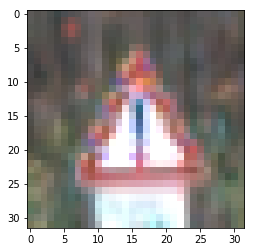

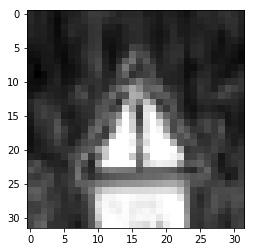

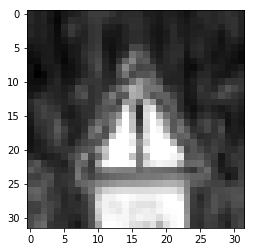

In [110]:
show_and_pred_certainty_X_train(40)

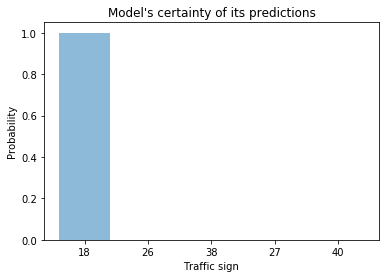

Traffic Sign Key
18 :  General caution
26 :  Traffic signals
38 :  Keep right
27 :  Pedestrians
40 :  Roundabout mandatory


In [111]:
plot_certainty_arrays([ 1.00000000e+00,   4.15819823e-10,   6.17791096e-11,
          5.62747730e-11,   3.19151996e-12], [18, 26, 38, 27, 40])

In [112]:
def show_and_pred_certainty_X_test(index):
    """Show image from training set and print model's certainty of its 
    prediction (of which traffic sign this image is).
    """
    plt.imshow(X_test[index])
    return certainty_of_predictions(X_test[index])

In [113]:
def show_and_pred_certainty_image_jpeg(image_name):

    new_image = mpimg.imread('jpeg/' + image_name)
    
    return certainty_of_predictions(new_image)


prediction_reshape_type 31    Wild animals crossing
Name: SignName, dtype: object
top_5_reshape_type:  TopKV2(values=array([[ 0.91209996,  0.05925055,  0.02088881,  0.00406575,  0.00294142]], dtype=float32), indices=array([[31, 25, 37, 29, 21]], dtype=int32))


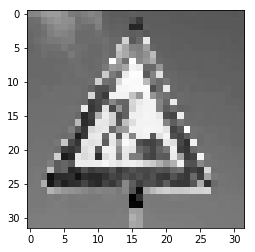

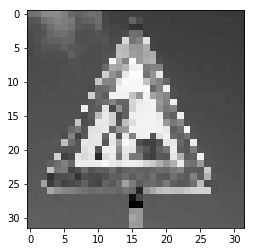

In [118]:
roadwork_top5 = show_and_pred_certainty_image_jpeg('roadwork.jpeg')

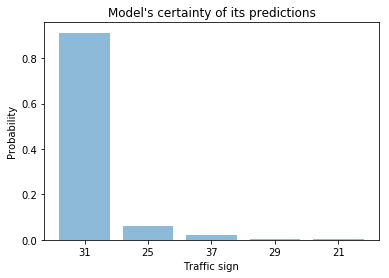

Traffic Sign Key
31 :  Wild animals crossing
25 :  Road work
37 :  Go straight or left
29 :  Bicycles crossing
21 :  Double curve


In [120]:
plot_certainty_arrays([ 0.91209996,  0.05925055,  0.02088881,  0.00406575,  0.00294142], [31, 25, 37, 29, 21])

prediction_reshape_type 33    Turn right ahead
Name: SignName, dtype: object
top_5_reshape_type:  TopKV2(values=array([[ 0.8507328 ,  0.13937281,  0.0043093 ,  0.00303278,  0.00157123]], dtype=float32), indices=array([[33, 35, 36, 17, 25]], dtype=int32))


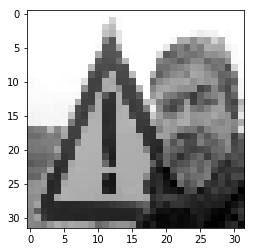

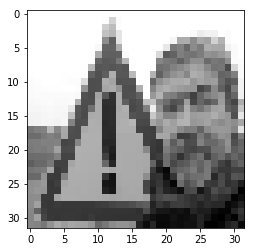

In [121]:
face_top5 = show_and_pred_certainty_image_jpeg('face_caution.jpeg')

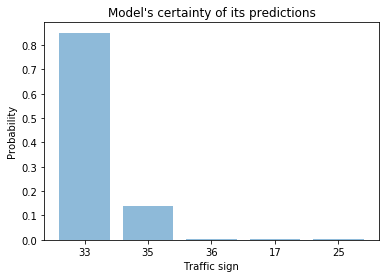

Traffic Sign Key
33 :  Turn right ahead
35 :  Ahead only
36 :  Go straight or right
17 :  No entry
25 :  Road work


In [122]:
plot_certainty_arrays([ 0.8507328 ,  0.13937281,  0.0043093 ,  0.00303278,  0.00157123], [33, 35, 36, 17, 25])

prediction_reshape_type 25    Road work
Name: SignName, dtype: object
top_5_reshape_type:  TopKV2(values=array([[ 0.46728641,  0.08239379,  0.08211805,  0.07949912,  0.05886332]], dtype=float32), indices=array([[25, 12, 38, 18, 20]], dtype=int32))


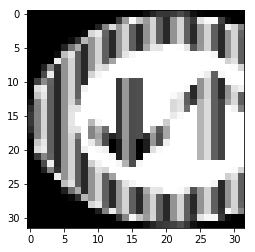

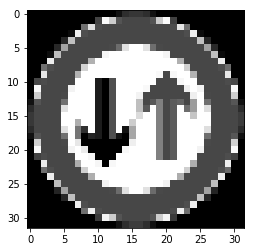

In [123]:
priority_top5 = show_and_pred_certainty_image_jpeg('priority_for_oncoming_vehicles.png')

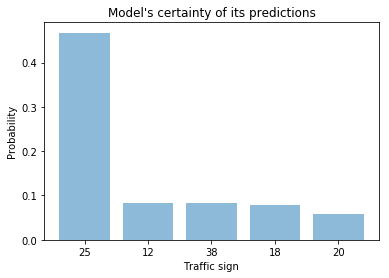

Traffic Sign Key
25 :  Road work
12 :  Priority road
38 :  Keep right
18 :  General caution
20 :  Dangerous curve to the right


In [124]:
plot_certainty_arrays([ 0.46728641,  0.08239379,  0.08211805,  0.07949912,  0.05886332], [25, 12, 38, 18, 20])

prediction_reshape_type 25    Road work
Name: SignName, dtype: object
top_5_reshape_type:  TopKV2(values=array([[  1.00000000e+00,   1.47684642e-09,   3.45504791e-10,
          1.46372692e-10,   1.40927704e-11]], dtype=float32), indices=array([[25, 20, 35, 29, 19]], dtype=int32))


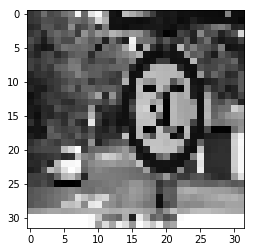

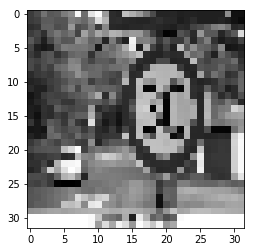

In [125]:
zone30_top5 = show_and_pred_certainty_image_jpeg('30zone.jpeg')

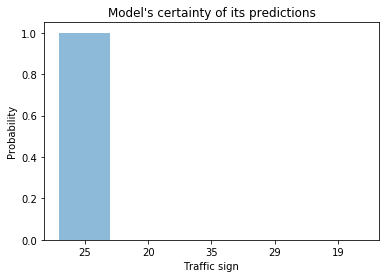

Traffic Sign Key
25 :  Road work
20 :  Dangerous curve to the right
35 :  Ahead only
29 :  Bicycles crossing
19 :  Dangerous curve to the left


In [126]:
plot_certainty_arrays([  1.00000000e+00,   1.47684642e-09,   3.45504791e-10,
          1.46372692e-10,   1.40927704e-11],
                      [25, 20, 35, 29, 19])

prediction_reshape_type 12    Priority road
Name: SignName, dtype: object
top_5_reshape_type:  TopKV2(values=array([[  9.99987364e-01,   1.25081933e-05,   6.57848673e-08,
          2.12460574e-08,   1.02046309e-08]], dtype=float32), indices=array([[12, 13,  2, 15, 38]], dtype=int32))


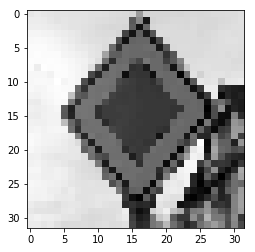

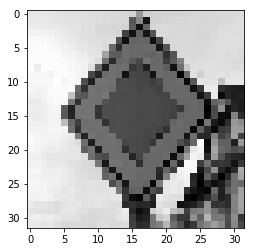

In [127]:
diamond_top5 = show_and_pred_certainty_image_jpeg('yellowdiamond.jpeg')

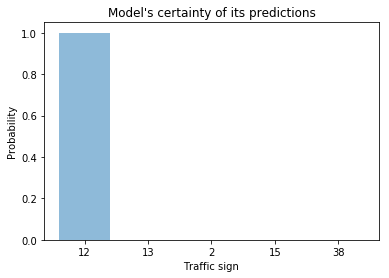

Traffic Sign Key
12 :  Priority road
13 :  Yield
2 :  Speed limit (50km/h)
15 :  No vehicles
38 :  Keep right


In [128]:
plot_certainty_arrays([  9.99987364e-01,   1.25081933e-05,   6.57848673e-08,
          2.12460574e-08,   1.02046309e-08],
                      [12, 13,  2, 15, 38])

prediction_reshape_type 12    Priority road
Name: SignName, dtype: object
top_5_reshape_type:  TopKV2(values=array([[ 0.33576977,  0.25063446,  0.09963173,  0.0981898 ,  0.04848846]], dtype=float32), indices=array([[12, 25,  3,  5,  9]], dtype=int32))


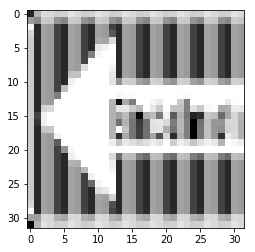

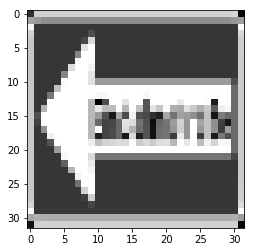

In [129]:
one_top5 = show_and_pred_certainty_image_jpeg('onewaystreet.png')

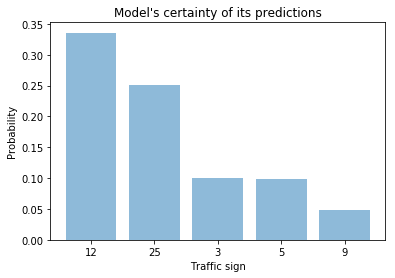

Traffic Sign Key
12 :  Priority road
25 :  Road work
3 :  Speed limit (60km/h)
5 :  Speed limit (80km/h)
9 :  No passing


In [130]:
plot_certainty_arrays([ 0.33576977,  0.25063446,  0.09963173,  0.0981898 ,  0.04848846],
                      [12, 25,  3,  5,  9])

In [ ]:
'''
Question 7
Is your model able to perform equally well on captured pictures when compared to testing on the dataset? 
The simplest way to do this check the accuracy of the predictions. 
For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate.

NOTE: You could check the accuracy manually by using signnames.csv (same directory). 
This file has a mapping from the class id (0-42) to the corresponding sign name. 
So, you could take the class id the model outputs, lookup the name in signnames.csv 
and see if it matches the sign from the image.

Answer: 1 / 6 = 16.7 %


1, road work under sun shine: wrong
2, general caution sigh with human face : wrong
3  priority_for_oncoming_vehicles: wrong
4, 30 zone: wrong
5, yellow diamond priority road: correct
6, one way street to left: wrong


'''

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [131]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    #featuremaps = activation.shape[3]
    featuremaps = activation.shape[-1]
    print( featuremaps, activation.shape[-1])
    
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [132]:
feature_img = X_train[10000]

In [133]:
#test_gray = cv2.cvtColor(feature_img, cv2.COLOR_BGR2GRAY)
#print("test_gray Shape: {}".format(test_gray.shape) + '\n')


resized_gray = np.dot(feature_img[...,:3], [0.299, 0.587, 0.114])
norm_type = (resized_gray * 1.0 / 255.) #(32,32)
reshape_type = np.reshape(norm_type, (1, 32, 32, 1))
    
test_gray_reshape = reshape_type

In [134]:
#test_gray_reshape = np.reshape(test_gray, (1, 32, 32, 1)).astype(np.int32)
#test_gray_reshape = np.reshape(test_gray, (1, 32, 32, 1))

print("test_gray_reshape Shape: {}".format(test_gray_reshape.shape) + '\n')

test_gray_reshape Shape: (1, 32, 32, 1)



In [135]:
test_activation = conv1.eval(session=sess,feed_dict={x : test_gray_reshape})

In [136]:
print("test_activation Shape: {}".format(test_activation.shape) + '\n')

test_activation Shape: (1, 28, 28, 6)



In [137]:
print("test_activation type: {}".format(type(test_activation)) + '\n')

test_activation type: <class 'numpy.ndarray'>



In [138]:
test_activation = conv2.eval(session=sess,feed_dict={x : test_gray_reshape})
print("test_activation Shape: {}".format(test_activation.shape) + '\n')

test_activation Shape: (1, 10, 10, 16)



In [139]:
test_activation = logits.eval(session=sess,feed_dict={x : test_gray_reshape})
print("test_activation Shape: {}".format(test_activation.shape) + '\n')

test_activation Shape: (1, 43)



In [ ]:
activation_min=-1
activation_max=-1 
plt_num=1

6 6


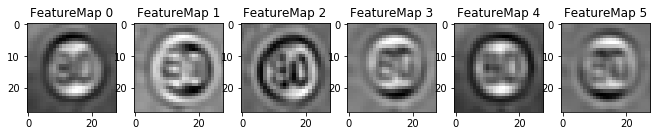

In [140]:
outputFeatureMap(test_gray_reshape, conv1)

16 16


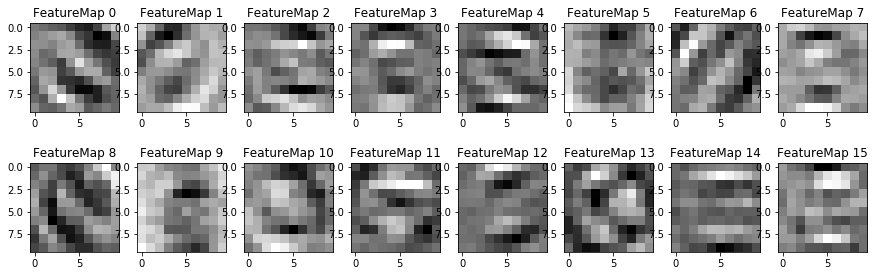

In [141]:
outputFeatureMap(test_gray_reshape, conv2)